Text(0, 0.5, 'Row #')

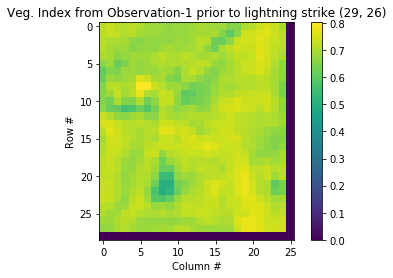

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import rasterio as rio
#Change file paths accordingly
setfilepath1 = './output/20190515_26.5103_-81.1920/PRE/20190424NDVI_crop.tif'
setfilepath2 = './output/20190515_26.5103_-81.1920/PRO/20190519NDVI_crop.tif'
with rio.open(setfilepath1) as src1:
    sample1 = src1.read(1, masked=True)
plt.imshow(sample1)
plt.colorbar()
plt.title('Veg. Index from Observation-1 prior to lightning strike {}'.format(sample1.shape))
plt.xlabel('Column #')
plt.ylabel('Row #')

Text(0, 0.5, 'Row #')

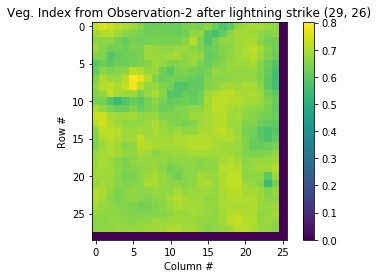

In [2]:
with rio.open(setfilepath2) as src2:
    sample2 = src2.read(1, masked=True)
plt.imshow(sample2)
plt.colorbar()
plt.title('Veg. Index from Observation-2 after lightning strike {}'.format(sample2.shape))
plt.xlabel('Column #')
plt.ylabel('Row #')

([array([ 1.,  0.,  1., 27.]),
  array([ 1.,  0.,  0., 28.]),
  array([ 1.,  0.,  3., 25.]),
  array([ 1.,  0.,  1., 27.]),
  array([ 1.,  0.,  1., 27.]),
  array([ 1.,  0.,  0., 28.]),
  array([ 1.,  0.,  1., 27.]),
  array([ 1.,  0.,  0., 28.]),
  array([ 1.,  0.,  0., 28.]),
  array([ 1.,  0.,  0., 28.]),
  array([ 1.,  0.,  2., 26.]),
  array([ 1.,  0.,  2., 26.]),
  array([ 1.,  0.,  1., 27.]),
  array([ 1.,  0.,  0., 28.]),
  array([ 1.,  0.,  0., 28.]),
  array([ 1.,  0.,  2., 26.]),
  array([ 1.,  0.,  1., 27.]),
  array([ 1.,  0.,  1., 27.]),
  array([ 1.,  0.,  0., 28.]),
  array([ 1.,  0.,  0., 28.]),
  array([ 1.,  0.,  0., 28.]),
  array([ 1.,  0.,  0., 28.]),
  array([ 1.,  0.,  2., 26.]),
  array([ 1.,  0.,  5., 23.]),
  array([ 1.,  0.,  5., 23.]),
  array([29.,  0.,  0.,  0.])],
 array([0.       , 0.2001882, 0.4003764, 0.6005646, 0.8007528],
       dtype=float32),
 <a list of 26 Lists of Patches objects>)

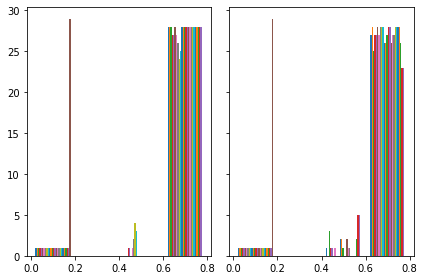

In [3]:
import numpy as np
N_points = 728
n_bins = 4

# Normal distribution
x = sample1
y = sample2

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
#print(sample1)
axs[0].hist(x, bins=n_bins)
axs[1].hist(y, bins=n_bins)

Text(0.5, 1.0, 'Diff (2019-05-19 - 2019-05-24)')

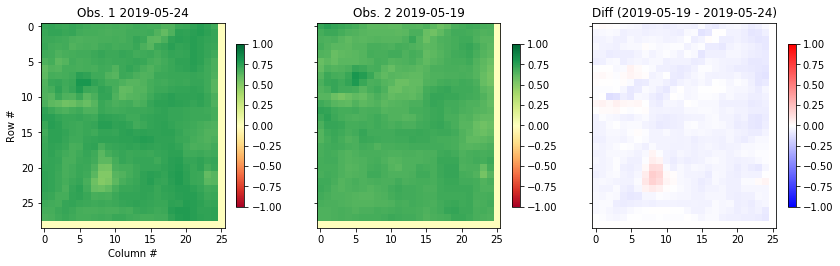

In [4]:
date = '2019-05-24'
date2 = '2019-05-19'
fig, axes = plt.subplots(1,3, figsize=(14,6), sharex=True, sharey=True)
plt.sca(axes[0])
plt.imshow(sample1, cmap='RdYlGn', vmin=-1, vmax=1)
plt.colorbar(shrink=0.5)
plt.title('Obs. 1 {}'.format(date))
plt.xlabel('Column #')
plt.ylabel('Row #')

plt.sca(axes[1])
plt.imshow(sample2, cmap='RdYlGn', vmin=-1, vmax=1)
plt.colorbar(shrink=0.5)
plt.title('Obs. 2 {}'.format(date2))

plt.sca(axes[2])
plt.imshow(sample2 - sample1, cmap='bwr', vmin=-1, vmax=1)
plt.colorbar(shrink=0.5)
plt.title('Diff ({} - {})'.format(date2, date))

In [5]:
from scipy import stats as st
pixel_list1 = sample1.flatten()
st.describe(pixel_list1)

DescribeResult(nobs=754, minmax=(0.0, 0.8027008), mean=0.65373135, variance=0.03444069, skewness=-3.095320463180542, kurtosis=8.080388484017238)

In [6]:
pixel_list2 = sample2.flatten()
st.describe(pixel_list2)

DescribeResult(nobs=754, minmax=(0.0, 0.8007528), mean=0.61986315, variance=0.030767266, skewness=-3.122426986694336, kurtosis=8.221607967449133)